# Classification Example with scikit-learn

Adapted and greatly expanded from the official scikit-learn documentation by Umberto Michelucci (umberto.michelucci@toelt.ai).

In [45]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The Digits Dataset

The dataset obtained from the `datasets.load_digits()` function in scikit-learn is a collection of hand-written digits, commonly used for practicing classification algorithms, particularly in the field of machine learning for image recognition. Here's a detailed description:

### Overview of the Digits Dataset
1. **Content**:
   - The dataset contains 1,797 images of hand-written digits (0 through 9).
   - Each image is a grayscale bitmap of 8x8 pixels, which means every image is represented as a 64-dimensional vector of pixel intensities.

2. **Target Variable**:
   - The target associated with each image is a digit from 0 to 9, indicating the actual number that the hand-written digit represents.

3. **Usage**:
   - It's primarily used for classification tasks, where the goal is to correctly identify the digit in each image.
   - Suitable for practicing techniques in image processing, machine learning classification algorithms, and pattern recognition.

### Loading the Dataset
- The dataset can be loaded using the `load_digits()` function:
  ```python
  from sklearn import datasets
  digits = datasets.load_digits()
  ```

### Key Features
1. **Data Attributes**:
   - `images`: The actual pixel data of the digits images. Each element is a 2D array of 8x8, representing an image.
   - `data`: The `images` array flattened into a 1D array of 64 pixel values, suitable for use with standard classifiers.
   - `target`: The label for each image. A number indicating the hand-written digit (0-9) the image represents.
   - `target_names`: An array of digits, from 0 to 9, representing the possible digits.

2. **Visualization**:
   - Images can be visualized using matplotlib or similar libraries in Python, which is often helpful for understanding the nature of the data.

3. **Preprocessing**:
   - While the dataset is relatively clean and preprocessed, standard machine learning practices like normalization or scaling pixel values can be applied.

### Example Code
```python
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

# Display the first digit
plt.figure(figsize=(2, 2))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

print('Target label:', digits.target[0])
```

### Applications and Challenges
- **Educational Tool**: It's an excellent dataset for educational purposes, especially for beginners to learn image classification.
- **Benchmarking**: Often used to benchmark performance of various classification algorithms.
- **Challenges**: While the dataset is relatively simple compared to real-world image datasets, it can be used to tackle challenges like image noise reduction, feature extraction, and multi-class classification.



In [29]:
digits = datasets.load_digits()

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the ```.data member```, which is a ```n_samples```, ```n_features array```. In the case of supervised problems, one or more response variables are stored in the ```.target``` member. M

In [5]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


and ```digits.target``` gives the ground truth for the digit dataset, that is the number corresponding to each digit image that we are trying to learn:

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

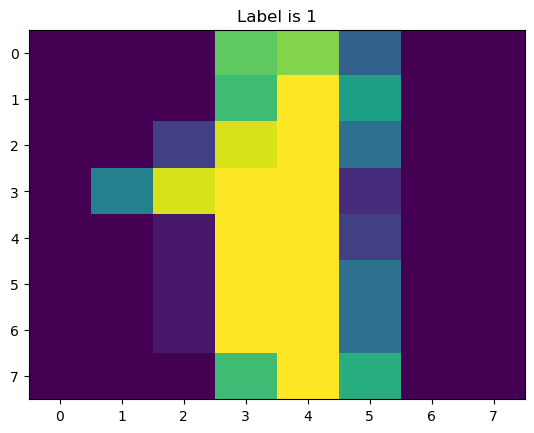

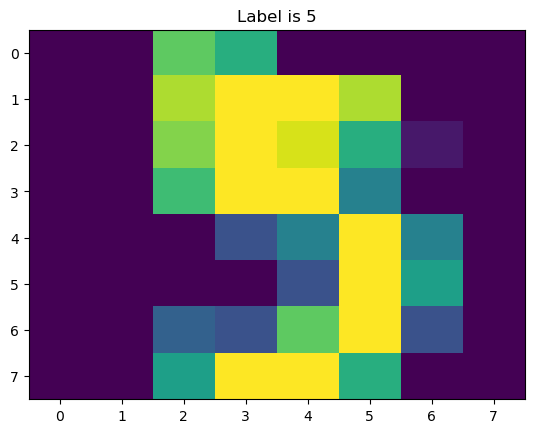

In [43]:
plt.imshow(digits.data[1].reshape(8,8),aspect = 'auto')
plt.title('Label is '+ str(digits.target[1]))
plt.show()
plt.title('Label is '+ str(digits.target[5]))
plt.imshow(digits.data[5].reshape(8,8),aspect = 'auto')
plt.show()

## Dataset splitting (hold-out approach)

`train_test_split()` is a function in scikit-learn, a popular Python library for machine learning, used to split datasets into random train and test subsets. This function is essential for evaluating the performance of a learning algorithm in a more reliable way. Here's a detailed description:

### Overview of `train_test_split()`
1. **Purpose**: 
   - The primary purpose of `train_test_split()` is to create a division of the data into separate sets for training and testing. This allows for the assessment of the model's performance on unseen data, which is crucial for understanding its generalization capabilities.

2. **Usage**: 
   - Commonly used in supervised learning scenarios where you have a dataset with known outcomes (labels or targets). The model is trained on one subset of the data and then tested on a separate subset to evaluate its performance.

### Key Features and Parameters
1. **Syntax**:
   ```python
   from sklearn.model_selection import train_test_split
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
   ```
   - `X`, `y`: The data you want to split. `X` is the feature set, and `y` is the labels or targets.
   - `test_size`: Proportion of the dataset to include in the test split (between 0.0 and 1.0).
   - `random_state`: Controls the shuffling applied to the data before the split. Pass an int for reproducible output across multiple function calls.

2. **Output**:
   - Returns four arrays: `X_train`, `X_test`, `y_train`, `y_test`.
   - `X_train`, `y_train` are the subsets of the data for training the model.
   - `X_test`, `y_test` are for testing the model.

3. **Stratified Split**:
   - For classification tasks, it is often beneficial to have the train and test sets with the same proportion of class labels as the original dataset. This can be achieved by setting the `stratify` parameter to the labels array (`y`).

### Practical Example
```python
import numpy as np
from sklearn.model_selection import train_test_split

# Example data
X, y = np.arange(10).reshape((5, 2)), range(5)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### Considerations
- Choosing the right `test_size` is important. Common splits are 70:30, 80:20, or 90:10 (train:test), depending on the dataset size.
- Setting `random_state` ensures reproducibility of your results.
- For small datasets, a stratified split can ensure that the train and test sets are representative of the overall dataset.


## Small Detour on ```reshape(..., -1)```

The `reshape((n_samples, -1))` method in Python, particularly when working with NumPy arrays or Pandas data structures, is used to reshape an array or a DataFrame into a specific shape while automatically inferring the size of one of the dimensions. Here's an explanation:

### Understanding `reshape((n_samples, -1))`

1. **`reshape` Method**:
   - This is a method in NumPy (and similar libraries) used to change the shape of an array without changing its data.

2. **Parameters**:
   - `n_samples`: This explicitly sets the size of the first dimension (number of rows).
   - `-1`: This is a placeholder that tells the method to automatically calculate the size of this dimension (number of columns).

3. **Automatic Dimension Calculation**:
   - When you use `-1`, the method automatically calculates the necessary size of that dimension based on the length of the array and the other dimension(s) specified.
   - Essentially, it means "reshape the array into `n_samples` rows and however many columns are needed to maintain the same number of elements."

### Practical Example

Suppose you have a 1-dimensional array with 12 elements, and you want to reshape it into a 2D array (matrix) with 3 rows. You can use `reshape((3, -1))`:

```python
import numpy as np

# 1D array with 12 elements
a = np.arange(12)

# Reshaping into 3 rows, columns calculated automatically
b = a.reshape((3, -1))

print(b)
# Output:
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]
```

### Applications

- **Preprocessing Data for Machine Learning**: Often, you'll need to reshape data before feeding it into a machine learning model. For example, flattening images into a 1D array for a neural network.
- **Flexibility in Data Transformation**: It's useful when the exact number of columns is not known beforehand or when the number of columns may change (e.g., different batches of data).

### Important Considerations

- The total number of elements must remain constant. If the array cannot be reshaped into the specified dimensions while keeping the same number of elements, an error will be raised.
- The `-1` parameter is a powerful tool but should be used with a clear understanding of the data's structure to avoid unintended reshaping results.


In [52]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
# This is an example of the hold-out approach for
# model validation.
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)


## Let us predict something with a Support Vector Classifier (SVC)

`sklearn.svm.SVC` is a class within the scikit-learn library in Python, used for classification tasks. It stands for Support Vector Classifier, which is a type of Support Vector Machine (SVM). Here's a detailed description:

### Overview of `sklearn.svm.SVC`
1. **Purpose**:
   - The `SVC` class implements the SVM algorithm for classification. SVM is a powerful machine learning model, particularly effective for high-dimensional datasets.

2. **How It Works**:
   - SVM works by finding the best hyperplane that separates data points of different classes. In `SVC`, this involves choosing the hyperplane with the largest margin between the classes.

### Key Features and Parameters
1. **Key Parameters**:
   - `C`: Regularization parameter. A higher value of `C` tells the model to give more weight to the training data, which could lead to a more complex model (risk of overfitting). A lower value encourages a simpler model (possibly underfitting).
   - `kernel`: Specifies the kernel type to be used. Common options are ‘linear’, ‘poly’, ‘rbf’ (radial basis function), and ‘sigmoid’. The choice of kernel affects the decision boundary.
   - `degree`: Degree of the polynomial kernel function (‘poly’). Ignored by other kernels.
   - `gamma`: Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. It defines how far the influence of a single training example reaches.
   - `class_weight`: Set the parameter to ‘balanced’ to automatically adjust weights inversely proportional to class frequencies.

2. **Methods**:
   - `fit(X, y)`: Fit the SVM model to the training data.
   - `predict(X)`: Perform classification on samples in `X`.
   - `decision_function(X)`: Evaluate the decision function for the samples in `X`.

3. **Usage**:
   - Suitable for binary and multiclass classification.
   - Often used in applications where clear margin of separation is observed in the data.

### Example Code
```python
from sklearn import svm
from sklearn.datasets import make_blobs

# Creating synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# SVM Classifier
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Predicting new data
new_data = [[3, 4], [5, 6]]
print(clf.predict(new_data))
```

### Considerations
- **Choosing the Right Kernel**: The choice of kernel and its parameters can greatly affect the model's performance.
- **Scaling Data**: SVMs are sensitive to feature scaling, so it's often necessary to scale data (e.g., using `StandardScaler`) before using `SVC`.
- **Computational Complexity**: For larger datasets, the computational cost can be high, especially with non-linear kernels.


An example of an estimator is the class ```sklearn.svm.SVC```, which implements support vector classification. The estimator’s constructor takes as arguments the model’s parameters.



In [48]:
clf = svm.SVC(gamma=0.001, C=100.)

In this example, we set the value of ```gamma manually```. To find good values for these parameters, we can use tools such as grid search and cross validation.

The ```clf``` (for classifier) estimator instance is first fitted to the model; that is, it must learn from the model. This is done by passing our training set to the ```fit``` method. For the training set, we’ll use all the images from our dataset, except for the last image, which we’ll reserve for our predicting. We select the training set with the ```[:-1]``` Python syntax, which produces a new array that contains all but the last item from digits.data:

In [53]:
clf.fit(X_train, y_train)

SVC(C=100.0, gamma=0.001)

Now you can predict new values. In this case, you’ll predict using the last image from ```digits.data```. By predicting, you’ll determine the image from the training set that best matches the last image.

In [59]:
clf.predict(X_test[4:5])

array([0])

let us plot the image and see if we agree with the classifier.

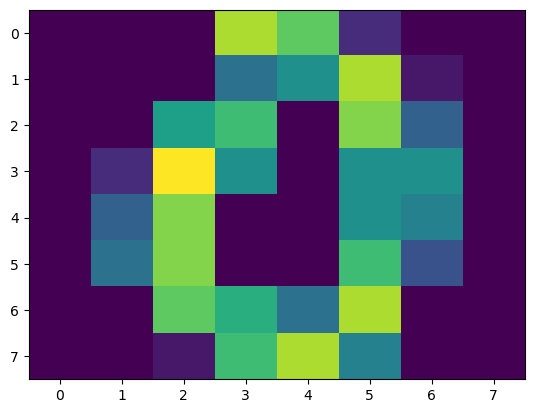

In [60]:
plt.imshow(X_test[4:5].reshape(8,8), aspect = 'auto')

## Let us check some metrics

In [61]:
preds = clf.predict(X_test)

## A Review of the Confusion Matrix

A confusion matrix is a table often used in classification tasks to visualize the performance of an algorithm. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class. Here's a brief explanation:

### Components of a Confusion Matrix
1. **True Positives (TP)**: The cases in which the model correctly predicted the positive class.
2. **True Negatives (TN)**: The cases in which the model correctly predicted the negative class.
3. **False Positives (FP)**: The cases in which the model incorrectly predicted the positive class (also known as a Type I error).
4. **False Negatives (FN)**: The cases in which the model incorrectly predicted the negative class (also known as a Type II error).

### Layout of the Matrix
- The confusion matrix is typically a 2x2 table in binary classification:

  
  | Actual Positive (P) | Actual Negative (N) |
  |---------------------|-----------------|
  | Predicted Positive (TP) | Predicted Negative (FN) |
  | Predicted Negative (FP) | Predicted Positive (TN) |


### Usage
- **Performance Evaluation**: It helps in evaluating the accuracy of a classification.
- **Calculating Metrics**: Important metrics like precision, recall, and F1-score are derived from the confusion matrix.
- **Identifying Imbalances**: It is particularly useful in revealing whether the model is confusing two classes, which is common in imbalanced datasets.

### Interpretation
- A model with perfect predictions would have only true positives and true negatives, so the confusion matrix would have non-zero values only on its diagonal.
- A high number of false positives or false negatives indicate potential issues with the model's performance.


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 87  1  0  0  0  0  0  2  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  2  4  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


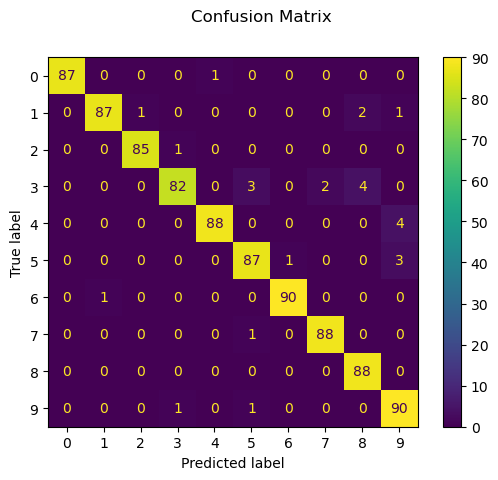

In [64]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [66]:
metrics.accuracy_score(y_test, preds)

0.9699666295884316

## Exercises

### Exercise 1

Try to perform the classification with another classifier and compare the results.

Reading Material: 

1. https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
2. https://scikit-learn.org/stable/supervised_learning.html

### Exercise 2 (more challenging)

Try to perform the classification with only two classes: the digit 0 (in class 0) vs. all the others (all in class 1). What challenges do you find this time?